In [ ]:
#This Program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) 
#to predict the closing stock price of a corporation with the help of their stock market code 
#using the past 60 day stock price.

#2K19/CO/265 Noel Vaibhav Surin
#2K19/CO/246 Neha Singh 

In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('dark_background')


In [ ]:
#Get the Stock quote/

df = web.DataReader('AAPL', data_source = 'yahoo', start='2019-01-01', end = '2020-11-5')
#show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.249401
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.439476
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,35.909672
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,35.829746
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.512772
...,...,...,...,...,...,...
2020-10-30,111.989998,107.720001,111.059998,108.860001,190272600.0,108.672516
2020-11-02,110.680000,107.320000,109.110001,108.769997,122866900.0,108.582664
2020-11-03,111.489998,108.730003,109.660004,110.440002,107624400.0,110.249794


In [ ]:
#get the number of rows and colums in the data set
df.shape

(467, 6)

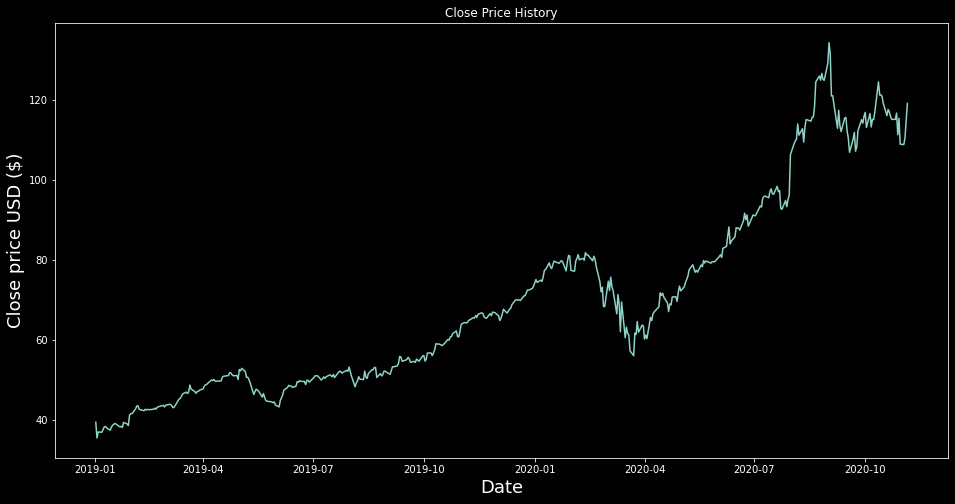

In [ ]:
#Visualise the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize = 18)
plt.show()

In [ ]:
#create a new datafram with only the 'Close column'
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

374

In [ ]:
#Scale the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03987022],
       [0.        ],
       [0.01538538],
       [0.01454893],
       [0.0216967 ],
       [0.02818543],
       [0.02942742],
       [0.02560006],
       [0.0197957 ],
       [0.02757713],
       [0.03231694],
       [0.03464882],
       [0.03708211],
       [0.02816009],
       [0.02973157],
       [0.02663928],
       [0.03946466],
       [0.03576408],
       [0.0316579 ],
       [0.05844929],
       [0.06146555],
       [0.06166832],
       [0.07365726],
       [0.0810838 ],
       [0.08123592],
       [0.07287152],
       [0.07152816],
       [0.06904416],
       [0.07274478],
       [0.07094516],
       [0.07251667],
       [0.07155349],
       [0.07284615],
       [0.0756343 ],
       [0.07317567],
       [0.07801688],
       [0.08121054],
       [0.08146403],
       [0.08283273],
       [0.0784731 ],
       [0.08308621],
       [0.08531672],
       [0.08450561],
       [0.08194562],
       [0.07682559],
       [0.07786481],
       [0.09304741],
       [0.098

In [ ]:
#Create the training Data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.03987022, 0.        , 0.01538538, 0.01454893, 0.0216967 ,
       0.02818543, 0.02942742, 0.02560006, 0.0197957 , 0.02757713,
       0.03231694, 0.03464882, 0.03708211, 0.02816009, 0.02973157,
       0.02663928, 0.03946466, 0.03576408, 0.0316579 , 0.05844929,
       0.06146555, 0.06166832, 0.07365726, 0.0810838 , 0.08123592,
       0.07287152, 0.07152816, 0.06904416, 0.07274478, 0.07094516,
       0.07251667, 0.07155349, 0.07284615, 0.0756343 , 0.07317567,
       0.07801688, 0.08121054, 0.08146403, 0.08283273, 0.0784731 ,
       0.08308621, 0.08531672, 0.08450561, 0.08194562, 0.07682559,
       0.07786481, 0.09304741, 0.0981421 , 0.10016984, 0.10528983,
       0.11134767, 0.11616355, 0.11238689, 0.1165184 , 0.13408359,
       0.12384357, 0.11798851, 0.11304589, 0.11730414, 0.11793781])]
[0.12105542886200593]

[array([0.03987022, 0.        , 0.01538538, 0.01454893, 0.0216967 ,
       0.02818543, 0.02942742, 0.02560006, 0.0197957 , 0.02757713,
       0.03231694, 0.03464882, 0.03

In [ ]:
#Convert the xtrain and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data because LSTM expects the input as a 3D array as 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(314, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer ='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

314/314 [==============================] - 6s 20ms/step - loss: 0.0022


In [ ]:
#Create the testing Dataset
#Create a new Array containing skilled value from index 1715 to 2200
test_data = scaled_data[training_data_len - 60: , :]
#Create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)


In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
#Get the root mean squared error(RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

5.701579362695582

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


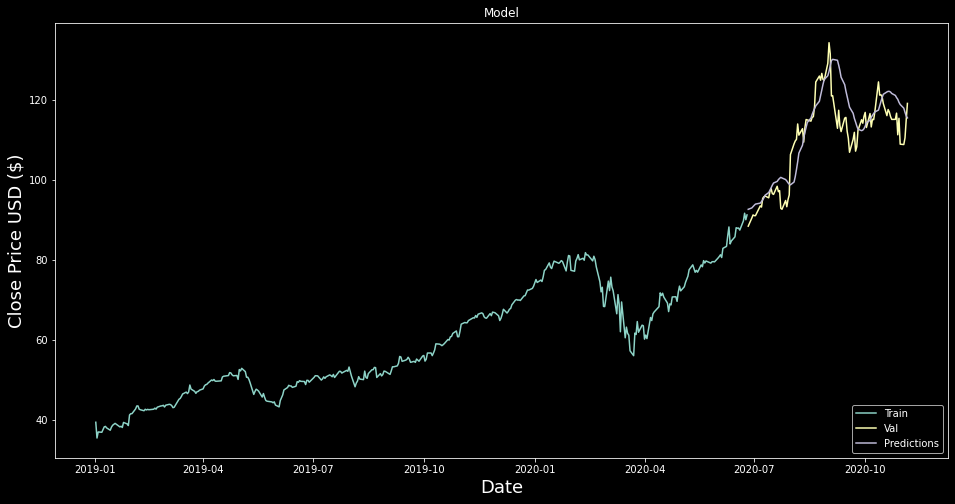

In [ ]:
#Plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualise the data
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize =18)
plt.ylabel("Close Price USD ($)", fontsize= 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#show the vlaid and the predicted prices
valid

,Close,Predictions
Date,,
2020-06-26,88.407501,92.606186
2020-06-29,90.445000,92.962097
2020-06-30,91.199997,93.289360
2020-07-01,91.027496,93.619308
2020-07-02,91.027496,93.910126
...,...,...
2020-10-30,108.860001,118.756897
2020-11-02,108.769997,117.846527
2020-11-03,110.440002,116.806313


In [ ]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2019-11-07', end='2020-11-05')
#Create a new dataFrame
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataFrame to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 to 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days 
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scald price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[115.57661]]


In [ ]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-11-05', end='2020-11-05')
print(apple_quote2['Close'])

Date
2020-11-05    119.029999
Name: Close, dtype: float64
